# DeZeroの基礎

In [8]:
import numpy as np
from dezero import Variable

x_np = np.array(5.0)

x = Variable(x_np)

y = 3 * x **2
print(y)

variable(75.0)


In [9]:
y.backward()
print(x.grad)

variable(30.0)


In [10]:
import numpy as np
from dezero import Variable
import dezero.functions as F

# Inner products
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a, b = Variable(a), Variable(b)  # Optional
c = F.matmul(a, b)
print(c)

# Matrix product
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = F.matmul(a, b)
print(c)

variable(32)
variable([[19 22]
          [43 50]])


In [11]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2)**2 + (x0 - 1)**2
    return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

variable(-2.0) variable(400.0)


In [12]:

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

lr = 0.001
iters = 10000

for i in range(iters):
    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

print(x0, x1)


variable(0.9944984367782456) variable(0.9890050527419593)


# 線形回帰

In [13]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)

42.296340129442335
0.24915731977561134
0.10078974954301652
0.09461859803040694
0.0902667138137311
0.08694585483964615
0.08441084206493275
0.08247571022229121
0.08099850454041051
0.07987086218625004
====
W = [[2.11807369]]
b = [5.46608905]


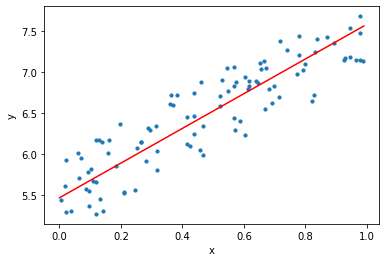

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# トイ・データセット
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)  # 省略可能

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    if i % 10 == 0:
        print(loss.data)

print('====')
print('W =', W.data)
print('b =', b.data)

# Plot
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

# ニューラルネットワーク

0.8473695850105871
0.25142862851836056
0.24759485466749864
0.23786120447054812
0.21222231333102926
0.16742181117834146
0.0968193261999264
0.07849528290602324
0.07749729552991153
0.07722132399559312


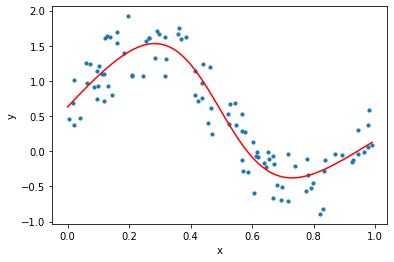

In [28]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))


def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()

    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data

    if i % 1000 == 0:
        print(loss.data)


# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

In [29]:
import dezero.layers as L

linear = L.Linear(10)

batch_size, input_size = 100, 5
x = np.random.randn(batch_size, input_size)
y = linear(x)

print("y shape:", y.shape)
print("params shape:", linear.W.shape, linear.b.shape)

for param in linear.params():
    print(param.name, param.shape)

y shape: (100, 10)
params shape: (5, 10) (10,)
b (10,)
W (5, 10)


In [36]:
from doctest import REPORT_UDIFF
from turtle import forward
from dezero import Model
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size, active_func):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        self.active_func = active_func

    def forward(self, x):
        if self.active_func == "relu":
            y = F.relu(self.l1(x))
        elif self.active_func=="sigmoid":
            y = F.sigmoid(self.l1(x))

        y = self.l2(y)
        return y

In [31]:
model = TwoLayerNet(10, 1)

for param in model.params():
    print(param)

model.cleargrads()

variable([0.])
variable(None)
variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
variable(None)


0.8165178492839196
0.24990280802148895
0.24609876581126014
0.23721590814318066
0.20793216413350174
0.12311905720649353
0.07888166506355147
0.07655073683421633
0.07637803086238222
0.0761876413118557


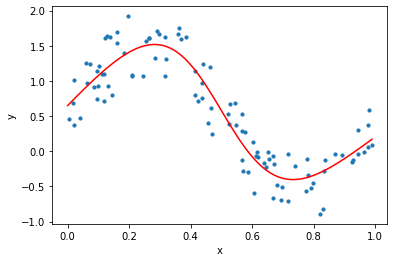

In [37]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)


lr = 0.2
iters = 10000

model = TwoLayerNet(10, 1, active_func="sigmoid")


for i in range(iters):
    y_pred = model.forward(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data

    if i % 1000 == 0:
        print(loss.data)


# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = model.forward(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

# オプティマイザ